In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

#reviews_df= pd.read_csv('C:\\Users\mmarri\Desktop\Amazon_Reviews.csv')
reviews_df= pd.read_csv('Amazon_Reviews.csv')

reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})

y=reviews_df['Label']

reviews_df.drop(columns='Label',axis=1,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,random_state=42,test_size=0.2)

In [16]:
import nltk

from nltk.tokenize import word_tokenize

sent='I have been eating a lot of junk these days. I should start hitting the gym from tomorrow.'

tokens=word_tokenize(sent)

nltk.pos_tag(tokens)

#'i'.stopwords('english')

[('I', 'PRP'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('junk', 'NN'),
 ('these', 'DT'),
 ('days', 'NNS'),
 ('.', '.'),
 ('I', 'PRP'),
 ('should', 'MD'),
 ('start', 'VB'),
 ('hitting', 'VBG'),
 ('the', 'DT'),
 ('gym', 'NN'),
 ('from', 'IN'),
 ('tomorrow', 'NN'),
 ('.', '.')]

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()


def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:',pure_tokens)
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens


preprocessing('I was eating my breakfast when you were playing')
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_train['Cleaned_text']

C:\Users\Vijay Muthyalu\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


183    hand track hear far complet though miss memor ...
38     work mac clearli say line work mac os system d...
24     like album thought would heard song two though...
142    pattern detail sketch although excit purchas b...
141    contemporari fairytal sure delight book take c...
                             ...                        
106    authent first encount yoruba say cd realli hel...
14     aw beyond belief feel write keep other wast mo...
92     omg soulwax own wow like amaz album ever everi...
179    yet anoth unsubstanti case believ discrimin ce...
102    ye got book expect much man wrong love book ma...
Name: Cleaned_text, Length: 159, dtype: object

In [ ]:
string='mmanohar95@@nitin12@nikhil'

tokenizer=RegexpTokenizer()

In [1]:
lemmatizer.lemmatize('countries',pos='n')

stemmer.stem('countries')
stemmer.stem('playing')

NameError: name 'lemmatizer' is not defined

In [36]:
vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_text'])

vectorizer.vocabulary_

C:\Users\mmarri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

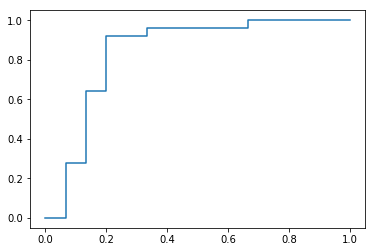

In [26]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


clf = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#clf.score(X_train_TfIdf.toarray(),y_train)


#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

#processed_test_review
X_test_tfIdf=vectorizer.transform(X_test['Cleaned_text'])

y_pred=clf.predict(X_test_tfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred=clf.predict_proba(X_test_tfIdf.toarray())[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

y_pred

C:\Users\mmarri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8533333333333333

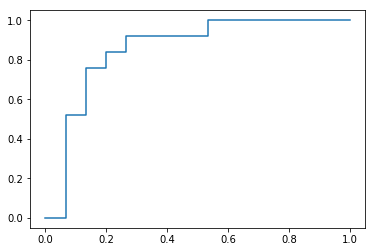

In [47]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)


In [35]:
def add(**x1):
    res=0
    for ele in x1:
        res=res+ele
        return res
    
    